In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop



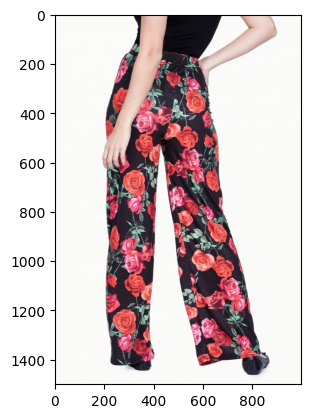

In [3]:
img=image.load_img(r'D:\AI\zz\training\tro\1761.jpg')
plt.imshow(img)

In [4]:
cv2.imread(r'D:\AI\zz\training\tro\1761.jpg')

array([[[249, 251, 251],
        [249, 251, 251],
        [249, 251, 251],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[249, 251, 251],
        [249, 251, 251],
        [249, 251, 251],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[249, 251, 251],
        [249, 251, 251],
        [249, 251, 251],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       ...,

       [[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]],

       [[248, 250, 250],
        [248, 250, 250],
        [248, 250, 250],
        ...,
        [249, 251, 251],
        [249, 251, 251],
        [249, 251, 251]]

In [4]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
testing=ImageDataGenerator(rescale=1/255)

In [5]:
train_dataset=train.flow_from_directory(r'D:\AI\zz\testing',
                                        target_size=(200,200),
                                        batch_size=16,
                                        class_mode='sparse')
validation_dataset=validation.flow_from_directory(r'D:\AI\zz\validation',
                                             target_size=(200,200),
                                             batch_size=16,
                                             class_mode='sparse')
test_dataset=testing.flow_from_directory(r'D:\AI\zz\testing',
                                             target_size=(200,200),
                                             batch_size=16,
                                             class_mode='sparse')

Found 740 images belonging to 3 classes.


Found 333 images belonging to 3 classes.
Found 740 images belonging to 3 classes.


In [6]:
train_dataset.class_indices

{'sho': 0, 't-shirt': 1, 'tro': 2}

In [7]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [10]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy'])


In [11]:
model.fit(train_dataset,
          epochs=50,
          batch_size=60,
          validation_data=validation_dataset)


Epoch 1/50


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 742ms/step - accuracy: 0.6880 - loss: 1.6756 - val_accuracy: 0.9159 - val_loss: 0.2855
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 37s 726ms/step - accuracy: 0.9482 - loss: 0.1415 - val_accuracy: 0.9159 - val_loss: 0.3515
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.9745 - loss: 0.0764 - val_accuracy: 0.9760 - val_loss: 0.1819
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 39s 785ms/step - accuracy: 0.9972 - loss: 0.0098 - val_accuracy: 0.8799 - val_loss: 0.6511
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 48s 980ms/step - accuracy: 0.9924 - loss: 0.0152 - val_accuracy: 0.8348 - val_loss: 1.4109
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 0.9938 - loss: 0.1343 - val_accuracy: 0.9700 - val_loss: 0.1721
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 47s 920ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.9610 - val_loss: 0.2244
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - accuracy: 1.0000 - loss: 5.3233e-05 - val_accuracy: 0.9730 - v

In [12]:
model.save('my_model.h5')


In [1]:
from keras.models import load_model
loaded_model = load_model('my_model.h5')


In [16]:
#evaluation = model.evaluate(train_dataset,train_dataset.classes)


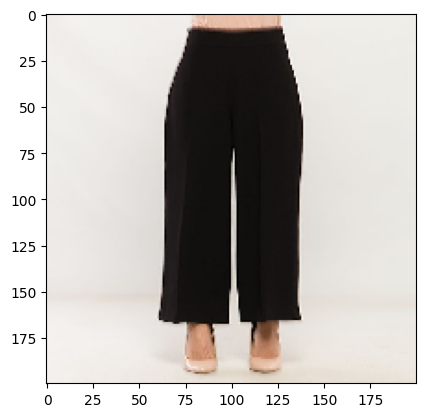

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
trouser


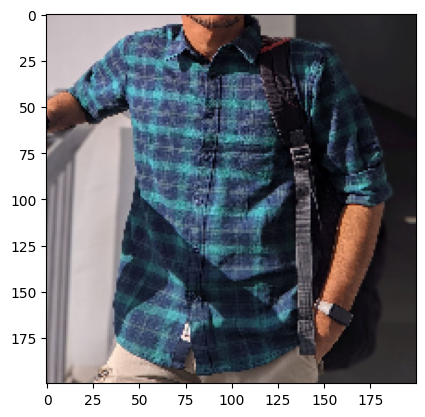

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
t-shirt


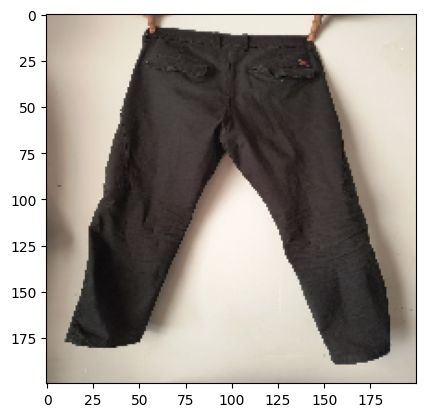

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
t-shirt


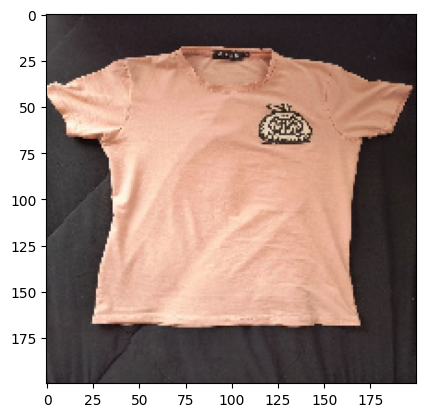

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
t-shirt


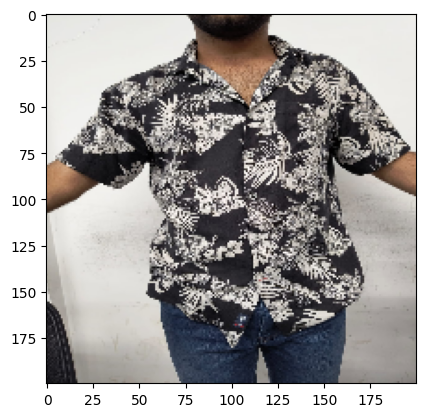

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
t-shirt


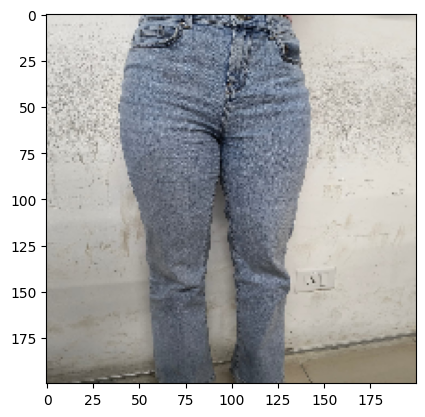

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
trouser


In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

dir_path = r"D:\AI\zz\test"



for filename in os.listdir(dir_path):
    img_path = os.path.join(dir_path, filename)
    img = image.load_img(img_path, target_size=(200, 200))
    plt.imshow(img)
    plt.show()

    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    result = loaded_model.predict(X)
    prediction = np.argmax(result) 
    
    if prediction == 0:
        print("sho")
    elif prediction == 1:
        print('t-shirt')
    else:
        print('trouser')


In [10]:

test_loss, test_acc = loaded_model.evaluate(test_dataset)

# Print the test accuracy
print("Test Accuracy:", test_acc)


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 27s 562ms/step - accuracy: 1.0000 - loss: 2.9826e-08
Test Accuracy: 1.0


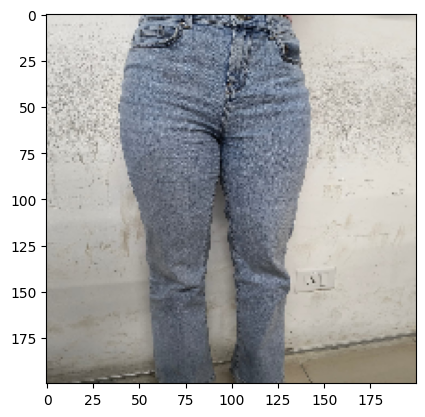

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
trouser


In [9]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

img_path = r"D:\images\image9.jpg"

img = image.load_img(img_path, target_size=(200, 200))
plt.imshow(img)
plt.show()
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
result = loaded_model.predict(X)
prediction = np.argmax(result) 
    
if prediction == 0:
    print("sho")
elif prediction == 1:
    print('t-shirt')
else:
    print('trouser')

